# 4th lecture on python

Topics of the lecture:

* Plot of more than one function in the same plot
* Construction of individual objects for a plot
* Adding an element to a 2D line
* Adding an element to a 3D line

## Many curves in one plot

Here we see how to add multiple curves to a signle plot.

In [1]:
print("Draw a function in 2D")
import sympy
from sympy import * # importing the whole sympy
from sympy.plotting import * # importing the plotting utilities
x, y, z = symbols("x, y, z") # symbols for the coordinates
t, s = symbols("t, s") # symbols for the parameters (parametric curves and surfaces) 

Draw a function in 2D


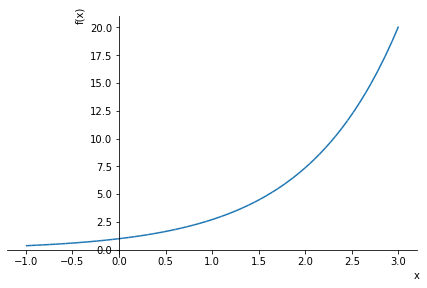

In [2]:
plot(exp(x), (x,-1,3))

Let's draw another curve together with the previous one


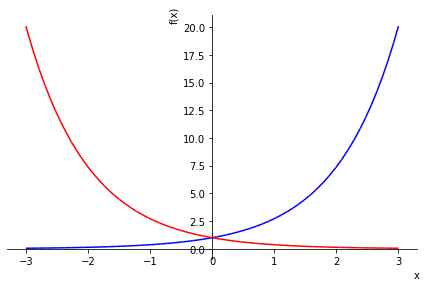

In [3]:
print("Let's draw another curve together with the previous one")
p1 = plot(exp(x), (x, -3, 3), line_color="blue", show=False) # e^x
p2 = plot(exp(-x), (x, -3, 3), line_color="red", show=False) # e^(-x)
p1.extend(p2)# adding p2 to the plot p1 -> p1+p2 together
p1.show() # showing the plot

Another example... Note that the ranges of the 'x' are different


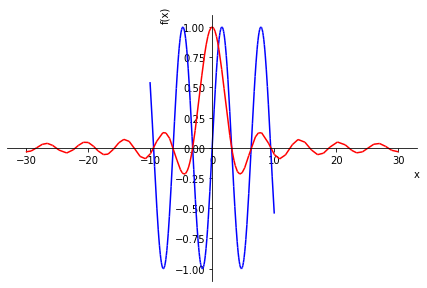

In [4]:
print("Another example... Note that the ranges of the 'x' are different")
p1 = plot(sin(x), (x, -10, 10), line_color="blue", show=False)
p2 = plot(sin(x)/x, (x, -30, 30), line_color="red", show=False)

p1.extend(p2)
p1.show()

Let's consider a function and its derivatives


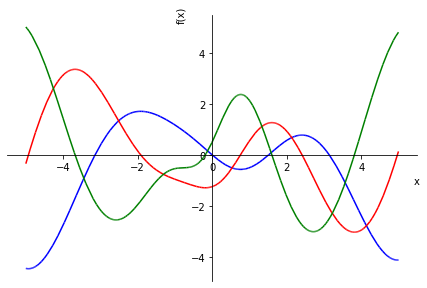

In [5]:
print("Let's consider a function and its derivatives")
def f(x):
    return sin(x)*(x**3 + x - 5)/(x**2 + 4)

a, b = -5, 5
f0 = plot(f(x), (x, a, b), line_color="blue", show=False)
f1 = plot(diff(f(x), x, 1), (x, a, b), line_color="red", show=False)
f2 = plot(diff(f(x), x, 2), (x, a, b), line_color="green", show=False)

f0.extend(f1)
f0.extend(f2)
f0.show()

We need a little trick to plot the function


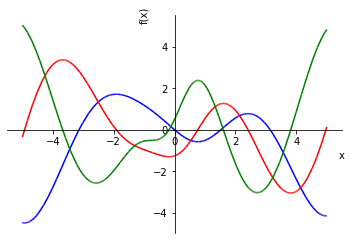

In [6]:
print("We need a little trick to plot the function")
backend = f0.backend(f0) # object editable with matplotlib
backend.process_series() # take into account what is contained inside f0
backend.fig.savefig('f_and_derivatives.png', dpi=300) # saving a .png
backend.fig.savefig('f_and_derivatives.pdf', dpi=300) # saving a .pdf

## Individual points

In can be useful to have individual colored elements in our plot, e.g.:

* Dots along a line
* Vectors along a line
* Plots changing color with the independent variable

Let's start with the addition of a single point to a 2D plot of a curve.

In [7]:
# usual importing of sympy and its submodules
import sympy 
from sympy import *
from sympy.plotting import *

In [8]:
print("Cardioid with a point at each integer 't'")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib


Cardioid with a point at each integer 't'


In [9]:
# symbolic expressions
t = sympy.symbols("t")
x_card = (1 - sympy.cos(t))*sympy.cos(t) 
y_card = (1 - sympy.cos(t))*sympy.sin(t)
display(x_card)
display(y_card)

ti, tf = 0.0, 2*np.pi
times = np.linspace(ti, tf, 100) # 100 points between 0 and 10
print("careful! now it's np.cos(), not simply cos(). This because cos() would take the sympy cos() function")
# numpy arrays
x_card_arr = (1 - np.cos(times))*np.cos(times) 
y_card_arr = (1 - np.cos(times))*np.sin(times)
print(x_card_arr,"\n")
print(y_card_arr)

(1 - cos(t))*cos(t)

(1 - cos(t))*sin(t)

careful! now it's np.cos(), not simply cos(). This because cos() would take the sympy cos() function
[ 0.          0.00200927  0.00798046  0.01774473  0.03102401  0.04743599
  0.06650091  0.0876502   0.11023664  0.13354603  0.15681007  0.17922035
  0.19994308  0.21813439  0.232956    0.24359089  0.24925877  0.24923111
  0.24284538  0.22951845  0.20875867  0.18017666  0.14349449  0.09855309
  0.04531788 -0.01611769 -0.08553051 -0.16256835 -0.24675244 -0.33748211
 -0.43404142 -0.53560768 -0.64126177 -0.75       -0.8607475  -0.97237278
 -1.08370331 -1.19354191 -1.30068355 -1.40393256 -1.50211969 -1.59411895
 -1.6788639  -1.75536316 -1.82271484 -1.88011974 -1.92689306 -1.96247445
 -1.98643627 -1.99848988 -1.99848988 -1.98643627 -1.96247445 -1.92689306
 -1.88011974 -1.82271484 -1.75536316 -1.6788639  -1.59411895 -1.50211969
 -1.40393256 -1.30068355 -1.19354191 -1.08370331 -0.97237278 -0.8607475
 -0.75       -0.64126177 -0.53560768 -0.43404142 -0.33748211 -0.24675244
 -0.16256835 -0.08553051

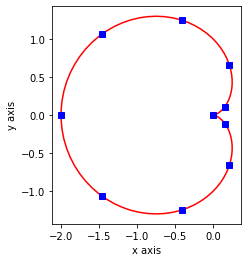

In [10]:
plt.axes().set_aspect("equal") # same scale on x and y 
plt.xlabel("x axis") # x-axis label
plt.ylabel("y axis") # y-axis label

plt.plot(x_card_arr, y_card_arr, color="red") # plot of the entire cardioid

n = 10
for i in range(0, n):
    xi = x_card.subs(t, i*2*np.pi/n).evalf()
    yi = y_card.subs(t, i*2*np.pi/n).evalf()
    plt.plot([xi], [yi], marker="s", color="blue")

plt.savefig("cardioid_squares.pdf")
plt.savefig("cardioid_squares.jpg")

plt.show() # show must be given after the saving of the files
plt.close() 

In [11]:
print("Now a curve dedicated to very smart students")

Now a curve dedicated to very smart students


In [12]:
# symbolic expressions
theta = symbols("\\theta")
r_srp_symb = 2 - 2*sin(theta) + sin(theta)*sqrt(abs(cos(theta)))/(sin(theta)+1.4)
display(r_srp_symb)

-2*sin(\theta) + 2 + sin(\theta)*sqrt(Abs(cos(\theta)))/(sin(\theta) + 1.4)

In [13]:
tht = np.linspace(0.0, 2*np.pi, 1000)
r_srp = 2 - 2*np.sin(tht) + np.sin(tht)*np.sqrt(np.fabs(np.cos(tht)))/(np.sin(tht)+1.4)

x_srp = r_srp*np.cos(tht)
y_srp = r_srp*np.sin(tht)

In [14]:
plt.axes().set_aspect("equal") # same scale on x and y 
plt.xlabel("x axis") # x-axis label
plt.ylabel("y axis") # y-axis label

plt.plot(x_srp, y_srp, color="red") # plot of the entire cardioid

n = 8
for i in range(0, n):
    phi = i*2*np.pi/n
    xi = r_srp_symb.subs(theta, phi).evalf()*cos(phi)
    yi = r_srp_symb.subs(theta, phi).evalf()*sin(phi)
    plt.plot([xi], [yi], marker="*", color="blue")

print("Look at the output files for your teacher's surprise gift")
plt.savefig("surprise.pdf")
plt.savefig("surprise.jpg")

# plt.show() # show must be given after the saving of the files
plt.close() 

Look at the output files for your teacher's surprise gift


## Arrows into a 2D plot

Here we define a function that returns the points of the segment AB, given the points A and B.

In [15]:
import sympy
from sympy import * # importing the whole sympy
from sympy.plotting import * # importing the plotting utilities

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [16]:
def get_segment(A, B, n=100):
    x = np.linspace(A[0], B[0], n)
    y = np.linspace(A[1], B[1], n)
    return [x, y]

In [17]:
print("Let's now find the velocity of a curve at a given point as the tangent vector to the curve:")
def get_velocity(f, x):
    x_prime = diff(x, x)
    f_prime = diff(f, x)
    return [x_prime, f_prime]

Let's now find the velocity of a curve at a given point as the tangent vector to the curve:


In [18]:
def get_velocity_vec(f, x, x0):
    v = get_velocity(f, x) # v(x_0)
    f0 = f.subs(x, x0).evalf() # f(x_0)
    p0 = np.array([float(x0), float(f0)]) # point at which I apply the velocity vector
    v_num = np.zeros(2) # empty numpy array of size 2
    v_num[0] = float(v[0].subs(x, x0).evalf())
    v_num[1] = float(v[1].subs(x, x0).evalf())
    p1 = p0 + v_num
    return get_segment(p0, p1)

[1, cos(x)]
[array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.7373

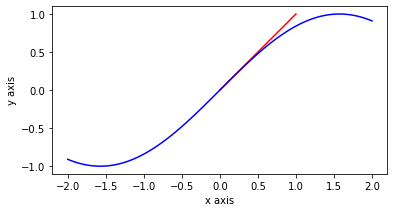

In [19]:
plt.axes().set_aspect("equal") # same scale on x and y 
plt.xlabel("x axis") # x-axis label
plt.ylabel("y axis") # y-axis label

x = sympy.symbols("x")
xy_vel = get_velocity_vec(sin(x), x, 0.0)
print(get_velocity(sin(x), x))
print(xy_vel)

plt.plot(xy_vel[0], xy_vel[1], color="red") # plot of the velocity vector

x_sin = np.linspace(-2, 2, 100) # 100 points in the inteval [-2,2]
y_sin = np.sin(x_sin) # 'y' values corresponding to the 'x'
plt.plot(x_sin, y_sin, color="blue") # plot of the entire function


plt.show() # showing the plot
plt.close() # closing in order to not mess up next plots

Let's consider again a function and its derivatives


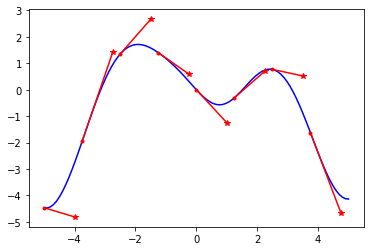

In [20]:
print("Let's consider again a function and its derivatives")
def f_num(x): # list of numeric values
    return np.sin(x)*(x**3 + x - 5)/(x**2 + 4)


def f_symb(x): # symbolic expression
    return sympy.sin(x)*(x**3 + x - 5)/(x**2 + 4)

a,b = -5, 5 # extrema of the interval
xi = np.linspace(a,b, 100) # 100 points between 'a' and 'b'
yi = f_num(xi) # list of points corresponding to each element of 'xi'
plt.plot(xi, yi, color="blue") # plot of the entire function # plotting the curve

n_m = 8 # number of markers -> number of vectors applied to the plot
x = sympy.symbols("x") # 'x' as a symbol
for i in range(0,n_m):
    xy_vel = get_velocity_vec(f_symb(x), x, a + i*(b-a)/n_m) # points of the segment representing the vector
    plt.plot(xy_vel[0][0], xy_vel[1][0], marker=".", color="red") # marker on the application point
    plt.plot(xy_vel[0], xy_vel[1], color="red") # plot of the velocity vector
    plt.plot(xy_vel[0][-1], xy_vel[1][-1], marker="*", color="red") # marker on the end point

plt.show() # showling the plot
plt.close() # closing in order to not mess up next plots

## Homework

This is a final exercise. Test the knowledge acquired in the previous lecture trying to reproduce the final figure (run the cells below and wait a few seconds for the result).

Try to do it yourself first. 
If you don't succeed look at the code below and add comments for each line to verify that you understand everything.


In [21]:
import sympy
from sympy import *
from sympy.plotting import *
import numpy as np

In [22]:
def sin_points(n, im, phi, h):
    points = [] # list of points
    for i in range(0,n):
        theta = i*(im/n)
        x = theta
        y = sin(x+phi)
        z = h
        points.append([x,y,z])
    return points

In [23]:
def get_line_pts(A0,B0, I=[-1,1], N=100):
    A = np.array(A0)
    B = np.array(B0)
    v = (A - B)
    rt_list = []
    t_list = np.linspace(I[0], I[1], N)
    for t in t_list:
        x = A[0] + v[0]*t
        y = A[1] + v[1]*t
        z = A[2] + v[2]*t
        rt_list.append([x,y,z])
    return rt_list

In [24]:
def get_xyz(rt):
    x, y, z = [], [], []
    for rt_i in rt:
        x.append(rt_i[0])
        y.append(rt_i[1])
        z.append(rt_i[2])
    return [x,y,z]

In [25]:
n = 80
im = 5*np.pi
phi = np.pi/2
h = 1
s1 = sin_points(n, im, 0.0, 0.0)
s2 = sin_points(n, im, phi, h)

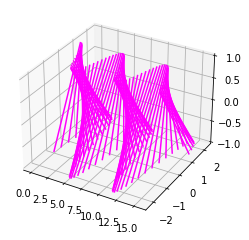

In [26]:
# %matplotlib notebook
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')

for i in range(0,n):
    rt  = get_line_pts(s1[i], s2[i])
    xyz = get_xyz(rt)
    ax.plot(xyz[0], xyz[1], xyz[2], color="magenta")

plt.show()